```
conda install -c conda-forge scikit-learn pandas
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### Primera actividad de redes neuronales

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_data = cancer.data
y_data = cancer.target

(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
- En el siguiente bloque explore la data, con el fin de responder a estas preguntas.
    - ¿De que se trata el dataset?
    - ¿Cuales son las clases de salida?
    - ¿A que corresponden las caracteristicas?
    - ¿Cuantas caracteristicas y clases de salida hay?
    - Etc.

¿De qué se trata el dataset?

El dataset contiene datos sobre muestras de tejido mamario de pacientes. Está diseñado para clasificar las muestras como malignas o benignas.

¿Cuáles son las clases de salida?
Hay dos clases de salida: 0 para benigno y 1 para maligno.
¿A qué corresponden las características?

Las características corresponden a varias propiedades del núcleo celular presentes en las muestras de tejido, como el radio, la textura, la perímetro, la área, la suavidad, la compacidad, la concavidad, los puntos cóncavos, la simetría y la dimensión fractal.

¿Cuántas características y clases de salida hay?
El dataset contiene 30 características y 2 clases de salida.

In [4]:
import torch
from torch.utils.data import random_split,DataLoader,TensorDataset

X = torch.tensor(X_data, dtype=torch.float32)
Y = torch.tensor(y_data,dtype=torch.long)

dataset = TensorDataset(X,Y)

train_set, valid_set,test_set = random_split(dataset,[342,113,114],generator=torch.Generator().manual_seed(1234)) ##No cambiar la semilla
train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

## Implentación de la Red Neuronal
- En el siguiente bloque implemente el modelo que utilizará su red neuronal para predecir si un paciente tiene cáncer o no, teniendo en cuenta sus caracteristicas.

In [5]:
import torch.nn as nn

class BreastCancerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BreastCancerModel, self).__init__()
        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

- En el siguiente bloque cree una instancia de su red neuronal definida anteriormente y defina una función de pérdida y optimizador adecuados:

In [6]:
model = BreastCancerModel(input_dim=30, hidden_dim=16, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

- Responda: 
    - ¿Porqué eligió esa función de pérdida?
        - CrossEntropyLoss se usa para problemas de clasificación multiclase como este.
    - Elija 2 optimizadores populares y describalos, luego explique porqué elige uno de los 2.

        -SGD o Stochastic Gradient Descent: Es un optimizador que actualiza los parámetros en la dirección del gradiente negativo de la función de pérdida.

        -Adam o Adaptive Moment Estimation: Combina las ventajas de los métodos AdaGrad y RMSProp. Es eficiente y requiere menos ajuste de parámetros.  
        
Elegimos Adam porque generalmente converge más rápido y pide menos ajustes de hiperparametros comparado a SGD.

- En el siguiente bloque programe el entrenamiento de su red neuronal

In [7]:
# Listas para guardar las pérdidas
train_losses = []
valid_losses = []

# Entrenamiento del modelo
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    # Validación del modelo
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            valid_loss += criterion(outputs, batch_y).item()
    
    # Promedio de pérdidas para esta época
    train_loss /= len(train_loader)
    valid_loss /= len(valid_loader)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}')

    

Epoch 1, Training Loss: 4.9891, Validation Loss: 2.1315
Epoch 2, Training Loss: 1.4447, Validation Loss: 1.0106
Epoch 3, Training Loss: 0.9712, Validation Loss: 0.6435
Epoch 4, Training Loss: 0.7056, Validation Loss: 0.5994
Epoch 5, Training Loss: 0.5340, Validation Loss: 0.6206
Epoch 6, Training Loss: 0.5502, Validation Loss: 0.5598
Epoch 7, Training Loss: 0.4521, Validation Loss: 0.5791
Epoch 8, Training Loss: 0.4259, Validation Loss: 0.4769
Epoch 9, Training Loss: 0.4139, Validation Loss: 0.5766
Epoch 10, Training Loss: 0.3717, Validation Loss: 0.4497
Epoch 11, Training Loss: 0.4315, Validation Loss: 0.5168
Epoch 12, Training Loss: 0.3343, Validation Loss: 0.4330
Epoch 13, Training Loss: 0.3288, Validation Loss: 0.4335
Epoch 14, Training Loss: 0.3229, Validation Loss: 0.4236
Epoch 15, Training Loss: 0.3296, Validation Loss: 0.4623
Epoch 16, Training Loss: 0.3231, Validation Loss: 0.3943
Epoch 17, Training Loss: 0.3390, Validation Loss: 0.5663
Epoch 18, Training Loss: 0.3399, Validat

- En el sigueinte bloque muestre el gráfico de entrenamiento y validación.
- ¿El entrenamiento de su red neuronal está "listo"?

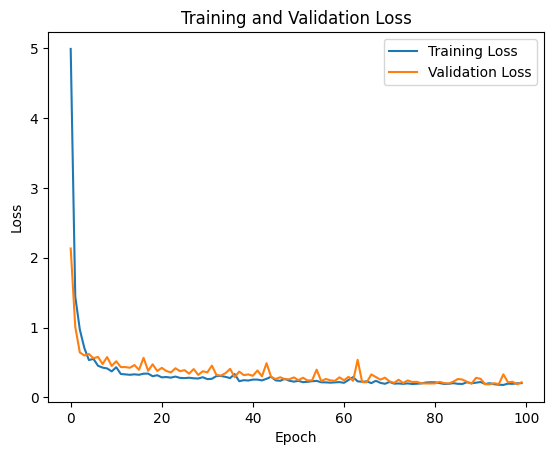

In [8]:
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



En el momento de la ejecución, se podría decir que el entrenamiento está listo ya que la pérdida de entrenamiento y validación convergen.

- En el siguiente bloque evalue que tan bueno es su modelo mediante diferentes métricas

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluar el modelo en el conjunto de prueba
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

# Calcular las métricas
conf_matrix = confusion_matrix(all_labels, all_preds)
class_report = classification_report(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Accuracy: {accuracy}')

Confusion Matrix:
[[33  1]
 [ 5 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.99      0.94      0.96        80

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315


- Concluya sobre su trabajo.  
- Responda
    - ¿Qué tan confiable sería su modelo en un entorno clínico? 
    - ¿Qué haría para mejorarlo?
    - Sobre la matriz de confusión, ¿Alguno de sus elementos son más importantes que otros en este caso?
    ¿Que significaría el aumento de FN o FP en este caso? 
- Investigue sobre alguna arquitectura de red neuronal distinta a la utilizada en este trabajo, describala y explique en que casos sería útil.



**¿Qué tan confiable sería su modelo en un entorno clínico?**

El modelo muestra un rendimiento bastante bueno, con una precisión del 91% al momento de la ejecución. Esto sugiere que podría ser una herramienta útil de apoyo en un entorno clínico. Sin embargo, aún se puede mejorar, especialmente considerando la importancia de los diagnósticos de cáncer.

**¿Qué haría para mejorarlo?**

Podría mejorar recolectando más datos, tratar de reducir más los falsos negativos, ajustanar los hiperparámetros y probando arquitecturas de red más avanzadas.

**Matriz de confusión: ¿Alguno de sus elementos son más importantes que otros en este caso?**

Sí, los falsos negativos (FN) son especialmente importantes porque podrían significar que no se detecta un cáncer.

**¿Qué significaría el aumento de FN o FP en este caso?**

-Aumento de FN: Sería muy grave. Significaría que más casos de cáncer no se están detectando, lo que podría resultar en retrasos en el tratamiento y peores pronósticos para los pacientes.

-Aumento de FP: Aunque menos crítico, llevaría a más diagnósticos incorrectos de cáncer. Esto causaría ansiedad innecesaria en los pacientes, costos adicionales en pruebas de seguimiento, y potencialmente procedimientos médicos innecesarios.

### Pregunta Bonus
- ¿Cúal es la principal limitación de las redes neuronales comparado al cerebro humano?

La principal limitación de las redes neuronales comparadas con el cerebro humano es su falta de flexibilidad y capacidad de generalización. Ya que que el cerebro humano puede aprender rápidamente de pocos ejemplos y adaptarse fácilmente a nuevas situaciones, las redes neuronales se limitan a tareas específicas para las que fueron entrenadas y requieren grandes cantidades de datos. Además, el cerebro humano es obviamente superior en razonamiento abstracto, comprensión contextual y eficiencia energética. Estas diferencias hacen que las redes neuronales aún estén lejos de replicar la flexibilidad del cerebro humano.